In [5]:
# Standard DS imports
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tqdm import tqdm
import ast
from sklearn import svm
import time
from sklearn.utils import class_weight

# All pytorch dependencies
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split



# all tensorflow dependencies
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
from keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [6]:
# Global var for selecting popularity cutoff
MINIMUM_POPULARITY_LIMIT = 40
MINIMUM_POPULARITY_PERCENTAGE = MINIMUM_POPULARITY_LIMIT / 100

In [7]:
def analyze_algorithm(y_true, y_pred):

    # Calculate all scoring metrics
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {round(accuracy, 6)}")
    
    
    precision = precision_score(y_true, y_pred, average='macro')
    print(f"Precision: {round(precision, 6)}")
    
    
    recall = recall_score(y_true, y_pred, average='macro')
    print(f"Recall: {round(recall, 6)}")
    
    
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"F1 Score: {round(f1, 6)}")
    

    precision_auc, recall_auc, _ = precision_recall_curve(y_true, y_pred)
    auprc = auc(recall_auc, precision_auc)
    print(f"AUPRC: {round(auprc, 6)}")


    # Visualize the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    



def print_correlation_matrix(dataframe):
    # Calculate correlation matrix
    corr_matrix = dataframe.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True,)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()





def predict_and_convert(model, x_data, y_data, cutoff):

    y_scores = model.predict(x_data)
    y_pred = (y_scores > cutoff).astype(int)
    y_data = (y_data > cutoff).astype(int)
    return y_data, y_pred





def find_best_kernel_value(is_classifier, x_train, y_train, x_test, y_test):
    k_values = range(1,2,1)
    train_scores = []
    test_scores = []
    scores_dict = {}

    for k in tqdm(k_values):
        model = neighbors.KNeighborsClassifier(k) if is_classifier else neighbors.KNeighborsRegressor(k)
        model.fit(x_train, y_train.values.ravel())

        y_train_predicted = model.predict(x_train)
        y_test_predicted = model.predict(x_test)

        if is_classifier:
            train_scores.append(f1_score(y_train, y_train_predicted, average='macro'))
            test_score = f1_score(y_test, y_test_predicted, average='macro')
        else:
            y_train_binary = (y_train >= MINIMUM_POPULARITY_LIMIT).astype(int)
            y_train_predicted_binary = (y_train_predicted >= MINIMUM_POPULARITY_LIMIT).astype(int)
            y_test_binary = (y_test >= MINIMUM_POPULARITY_LIMIT).astype(int)
            y_test_predicted_binary = (y_test_predicted >= MINIMUM_POPULARITY_LIMIT).astype(int)
            
            # Then, compute the accuracy
            train_scores.append(f1_score(y_train_binary, y_train_predicted_binary, average='macro'))
            test_score = f1_score(y_test_binary, y_test_predicted_binary, average='macro')

        test_scores.append(test_score)
        scores_dict[k] = test_score

    plt.plot(k_values, train_scores, 'r-s', label='Train')
    plt.plot(k_values, test_scores, 'b-o', label='Test')
    plt.legend()
    plt.show()

    best_k = max(scores_dict, key=scores_dict.get)
    print(f"The best k value is : {best_k} with score: {scores_dict[best_k]}")

    return best_k





def f1_score_nn(y_true, y_pred):
    # Calculate Precision and Recall
    precision = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) / K.sum(K.round(K.clip(y_pred, 0, 1)) + K.epsilon())
    recall = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) / K.sum(K.round(K.clip(y_true, 0, 1)) + K.epsilon())

    # Calculate F1 Score
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return f1_val

tracks.csv read in successfully as a dataframe


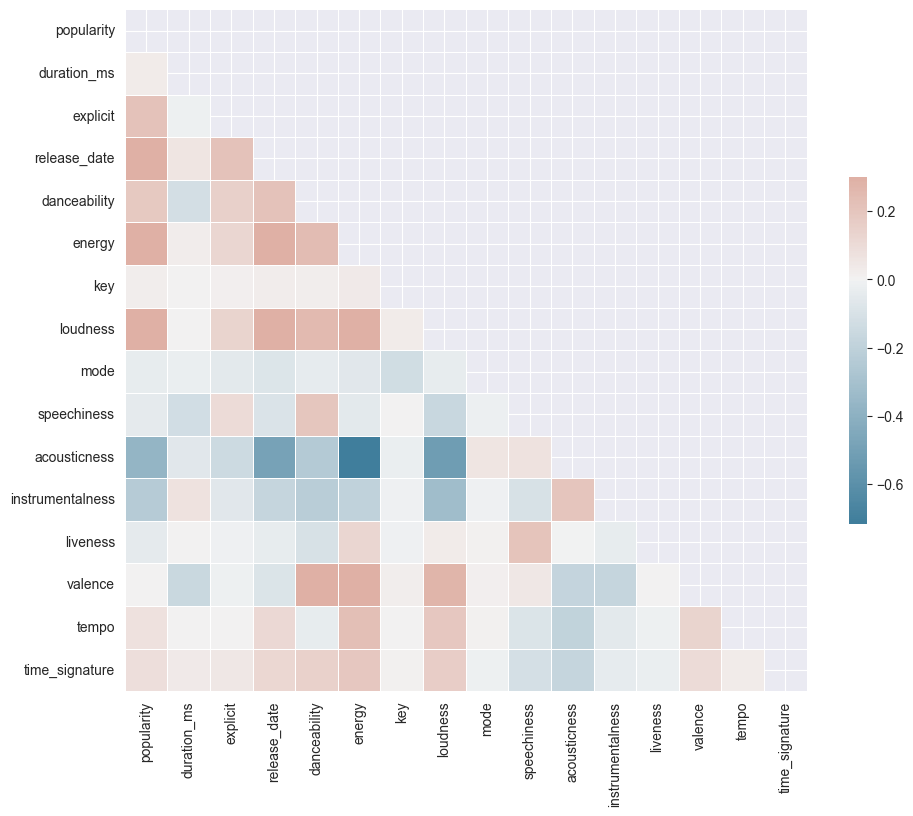

3667/3667 [==============================] - 1s 230us/step


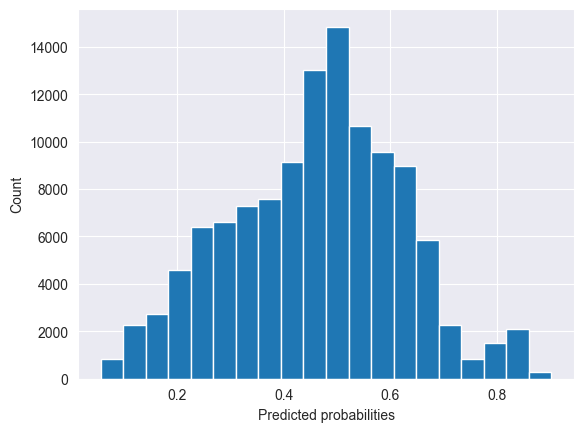

14667/14667 [==============================] - 3s 236us/step

scores for the Training set:
Accuracy: 0.678434
Precision: 0.642363
Recall: 0.683851
F1 Score: 0.63968
AUPRC: 0.59459


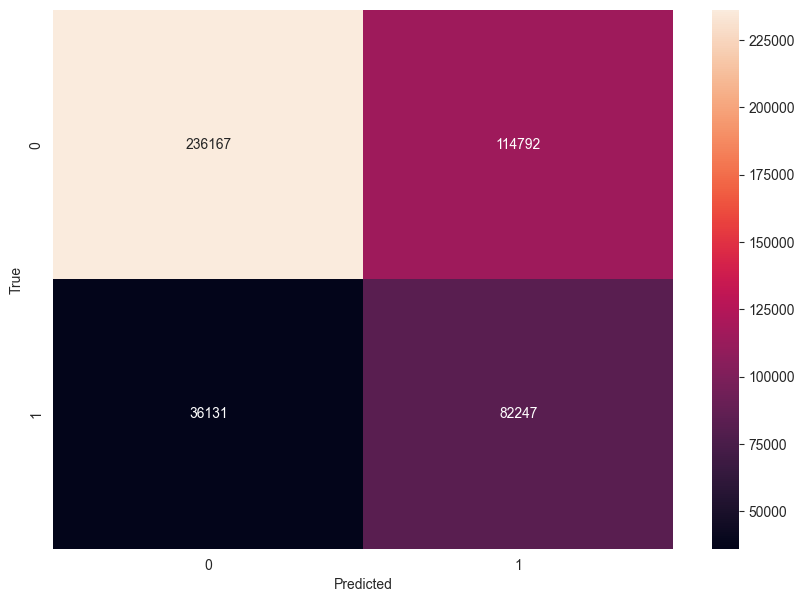

3667/3667 [==============================] - 1s 264us/step

scores for the Testing set:
Accuracy: 0.677939
Precision: 0.641848
Recall: 0.684511
F1 Score: 0.638719
AUPRC: 0.593606


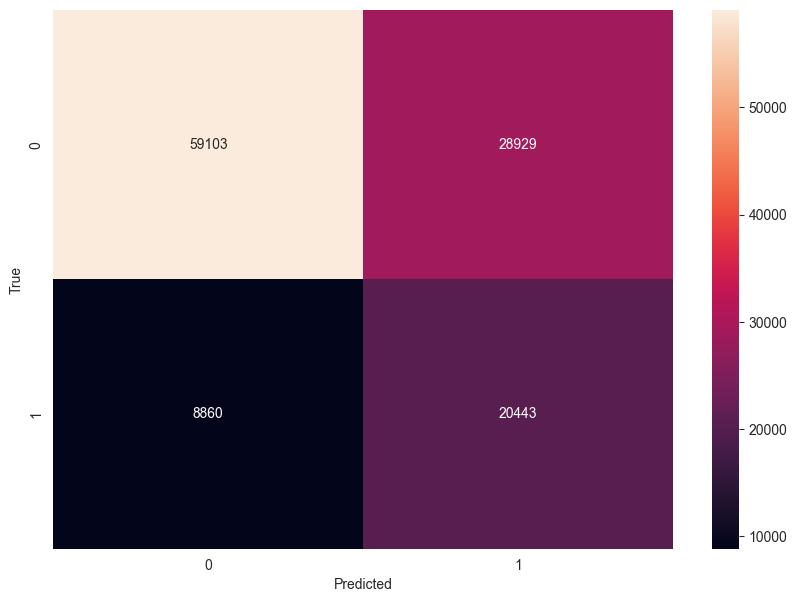

dataset.csv read in successfully as a dataframe


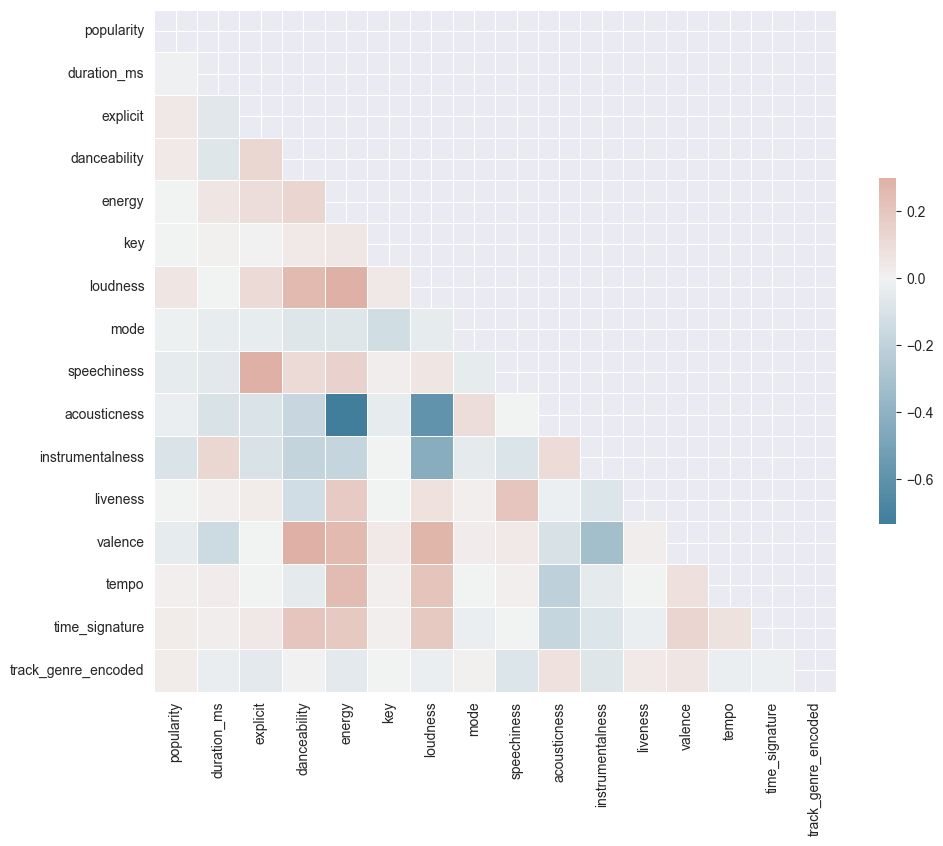

713/713 [==============================] - 0s 239us/step


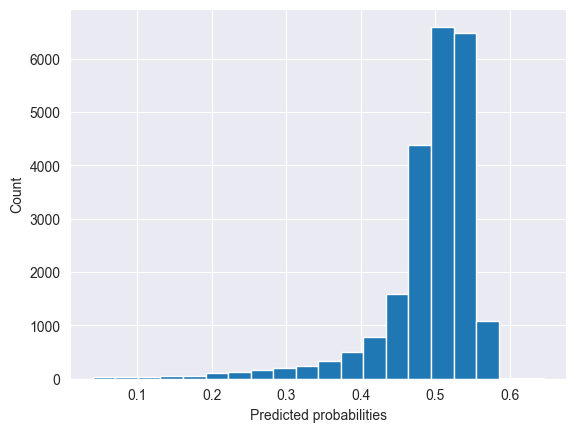

2850/2850 [==============================] - 1s 234us/step

scores for the Training set:
Accuracy: 0.531919
Precision: 0.544266
Recall: 0.544979
F1 Score: 0.531621
AUPRC: 0.611598


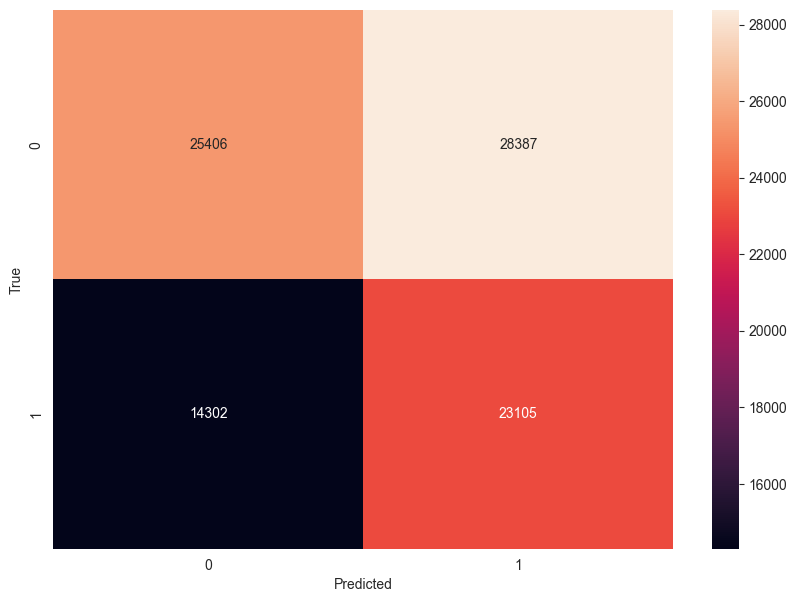

713/713 [==============================] - 0s 254us/step

scores for the Testing set:
Accuracy: 0.528114
Precision: 0.541434
Recall: 0.542162
F1 Score: 0.527786
AUPRC: 0.607564


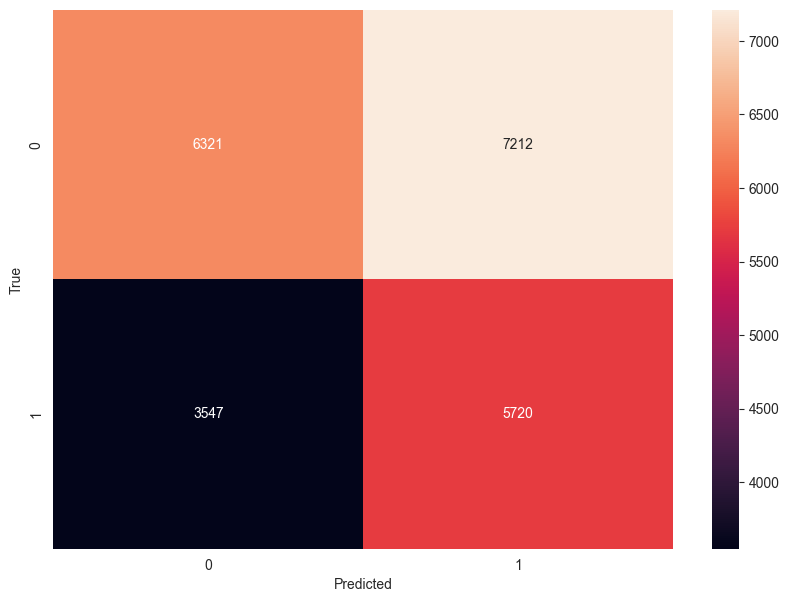


Execution time: 20.87620210647583 seconds


In [13]:
# Putting file specific info into arrays for easier access
files = ['tracks.csv', 'dataset.csv']
inputs = [
            [ 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit'],
                  
            ['track_genre_encoded', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit']
        ]
target = ['popularity']

start_time = time.time()


for i in range(len(files)):

    

    df = pd.read_csv('./'+files[i])
    print(files[i], 'read in successfully as a dataframe')
    # File specific cleaning
    
    # Data cleaning for tracks.csv
    if i == 0:
        df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
        df = df.drop(columns=['id', 'name', 'artists', 'id_artists'])
        
    # Data cleaning for dataset.csv
    if i == 1:
        df['track_genre_encoded'] = LabelEncoder().fit_transform(df['track_genre'])
        df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'])
        
       
    print_correlation_matrix(df)

    xtrain, xtest, ytrain, ytest = train_test_split(df[inputs[i]], df[target], test_size=0.2, random_state=42)

    # Training Model 1 KNN-Regressor
    kernelNumber = find_best_kernel_value(False, xtrain, ytrain, xtest, ytest)

    modelOne = neighbors.KNeighborsRegressor(kernelNumber)
    modelOne.fit(xtrain, ytrain)
    print('KNN-Regressor Fitted')

    # Apply a same threshold to train predictions
    y_train, y_train_pred = predict_and_convert(modelOne, xtrain, ytrain, MINIMUM_POPULARITY_LIMIT)
    print('\nscores for the training set:')
    analyze_algorithm(y_train, y_train_pred)

    y_test, y_test_pred = predict_and_convert(modelOne, xtest, ytest, MINIMUM_POPULARITY_LIMIT)
    print('\nscores for the testing set:')
    analyze_algorithm(y_test, y_test_pred)





    # Training Model 2 KNN-Classifier
    y_train_two = (ytrain > MINIMUM_POPULARITY_LIMIT).astype(int)
    y_test_two = (ytest > MINIMUM_POPULARITY_LIMIT).astype(int)

    kernelNumber = find_best_kernel_value(True, xtrain, y_train_two, xtest, y_test_two)

    modelTwo = neighbors.KNeighborsClassifier(kernelNumber)
    modelTwo.fit(xtrain, y_train_two.values.ravel())
    print('KNN-Classifier Fitted')

    y_train_pred = modelTwo.predict(xtrain)
    print('\nscores for the training set:')
    analyze_algorithm(y_train_two, y_train_pred)

    # Apply a same threshold to test predictions
    y_test_pred = modelTwo.predict(xtest)
    print('\nscores for the testing set:')
    analyze_algorithm(y_test_two, y_test_pred)
    
    



    # The first dataset is too big to reasonably run with SVM as it generally take O(n^3*d) time for training
    if i == 1:
        # Training Model 3 SVM
        y_train = (ytrain > MINIMUM_POPULARITY_LIMIT).astype(int)
        y_test = (ytest > MINIMUM_POPULARITY_LIMIT).astype(int)

        sc = StandardScaler()
        X_train = sc.fit_transform(xtrain)
        X_test = sc.transform(xtest)

        # Training the SVM model on the Training set using a linear kernel
        print('SVM-Classifier Training...')
        svm_classifier = SVC(kernel = 'rbf', random_state = 42)
        svm_classifier.fit(X_train, y_train.values.ravel())  
        print('SVM-Classifier Fitted')

        # Predicting the results
        print('\nscores for the training set:')
        y_pred = svm_classifier.predict(X_train)
        analyze_algorithm(y_train, y_pred)

        print('\nscores for the testing set:')
        y_pred = svm_classifier.predict(X_test)
        analyze_algorithm(y_test, y_pred)






    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[inputs[i]], df[target], test_size=0.2, random_state=42)
    y_train = (y_train > MINIMUM_POPULARITY_LIMIT).astype(int)
    y_test = (y_test > MINIMUM_POPULARITY_LIMIT).astype(int)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    # Define the neural network structure
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=[f1_score_nn])

    y_train_numpy = y_train.to_numpy().astype('int64')
    unique_classes, class_counts = np.unique(y_train_numpy, return_counts=True)
    class_weights_dict = {class_label: len(y_train_numpy) / count for class_label, count in zip(unique_classes, class_counts)}

    
    # pass the class weights to model.fit
    model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=100, class_weight=class_weights_dict)
    
    # Evaluate the model
    model.evaluate(X_test, y_test)
    
    # Make predictions

    predictions = model.predict(X_test)
    plt.hist(predictions, bins=20)
    plt.xlabel('Predicted probabilities')
    plt.ylabel('Count')
    plt.show()


    predictions = (model.predict(X_train) > 0.5).astype("int64")
    print('\nscores for the Training set:')
    analyze_algorithm(y_train, predictions)
    
    
    predictions = (model.predict(X_test) > 0.5).astype("int64")
    print('\nscores for the Testing set:')
    analyze_algorithm(y_test, predictions)
    
    

# End timing and print the result
end_time = time.time()

print("\nExecution time: {} seconds".format(end_time - start_time))
    